# Canadian Credit Union Yelp and Asset Growth Project

Here we explore the correlation between Yelp! reviews and asset growth using various recurrent neural networks. From our experimentation with the data, and features, we found _ yielded the best accuracy of future asset growth. This prediction was generated using Yelp! reviews and sentiment analysis.


## Initial Set-Up

Here we will import the necessary libraries that we will need for the project. Additionally, will read in the data collected from various Canadian Credit Unions and their corresponding Yelp! reviews. 

In [1]:
# Let's first start by importing the libraries and data we'll need
# Libraries needed include numpy, keras, matplotlib

import numpy as np
import keras
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import SentimentAverages as sa

# Import data

data = pickle.load(open("dfFinal.p", "rb"))

print(data)

cudata = pd.read_excel("cuinfo.xlsx", sheet_name=None)

Using TensorFlow backend.


Company     Vancity                                                     \
Type          Dates                                            Reviews   
0         5/19/2013  Though there's metered parking in this tight s...   
1         10/5/2018  Worst customer service. Truly do not give a da...   
2         6/21/2018  My mortgage application experience: very unpro...   
3         9/21/2018  I went to see a "wealth specialist". I had to ...   
4         10/5/2018  Very unreliable online banking.  Super slow in...   
5         10/5/2018  very bad customer service ,i never know who is...   
6         8/22/2014  Worst online credit card service, if for some ...   
7         8/30/2014  Nope.  We called in for a fair and fast loan. ...   
8         9/14/2015  I have only been a member here for about three...   
9         9/13/2016  I have tried six times to close my account.  I...   
10         8/2/2014  Great service at this branch. It's not the clo...   
11        3/20/2014  Vancity has alway

## Data Preparation 

Structure the data correctly as to be easily used by the generator and the keras model.

In [2]:
print(list(cudata.keys()))
companies = list(data.columns.levels[0])
print(companies)

['Sheet1', 'Vancity', 'Coast Capital', 'Servus', 'Meridian', 'First West', 'Conexus', 'Affinity', 'Steinbach', 'Assiniboine', 'Connect First']
['Vancity', 'Coast Capital Savings', 'Servus Credit Union', 'Meridian Credit Union', 'Affinity Federal Credit Union', 'Assiniboine Credit Union']


In [3]:
indecies = ['Vancity','Coast Capital Savings','Servus Credit Union','Meridian Credit Union','Affinity Federal Credit Union']

print('Vancity')
vancity = sa.getSentimentAves('Vancity')
print(vancity)
print('Coast Capital Savings')
print(sa.getSentimentAves('Coast Capital Savings'))
print('Servus Credit Union')
print(sa.getSentimentAves('Servus Credit Union'))
print('Meridian Credit Union')
print(sa.getSentimentAves('Meridian Credit Union'))
print('Affinity Federal Credit Union')
print(sa.getSentimentAves('Affinity Federal Credit Union'))

Vancity
     Average Sentiment
2005               0.5
2006               0.5
2007               0.5
2008          0.308744
2009          0.268793
2010          0.123202
2011          0.245508
2012           0.36225
2013          0.397002
2014          0.397283
2015          0.236001
2016          0.226183
2017         0.0657885
2018           0.14174
2019               0.5
Coast Capital Savings
     Average Sentiment
2005               0.5
2006               0.5
2007               0.5
2008               0.5
2009               0.5
2010               0.5
2011          0.665751
2012          0.351338
2013          0.145551
2014          0.300713
2015          0.254801
2016          0.335574
2017         0.0473146
2018          0.168033
2019          0.134811
Servus Credit Union


C:\Users\Troy\Documents\Design Teams\QMIND\Yelp-NLP\SentimentAverages.py:31: RuntimeWarning: invalid value encountered in long_scalars
  yearAve = sumSent / numSent


     Average Sentiment
2005               0.5
2006               0.5
2007               0.5
2008               0.5
2009        0.00802595
2010               0.5
2011          0.365569
2012          0.705904
2013          0.611185
2014          0.596162
2015          0.469501
2016          0.177316
2017           0.74538
2018          0.314643
2019          0.984288
Meridian Credit Union
     Average Sentiment
2005               0.5
2006               0.5
2007               0.5
2008               0.5
2009               0.5
2010               0.5
2011          0.543043
2012          0.065675
2013          0.859437
2014               0.5
2015          0.762913
2016        0.00126494
2017         0.0701768
2018          0.159958
2019        0.00416663
Affinity Federal Credit Union
     Average Sentiment
2005               0.5
2006               0.5
2007               0.5
2008               0.5
2009               0.5
2010          0.496567
2011          0.136112
2012          0.378233
2013 

In [4]:
# Extract data from excel
finaldata = [0,1,2,3,4]
for company in companies:
    # Translate Names
    if company == "Vancity":
        header = "Vancity"
        index = 0
    elif company == "Coast Capital Savings":
        header = "Coast Capital"
        index = 1
    elif company == "Servus Credit Union":
        header = "Servus"
        index = 2
    elif company == "Meridian Credit Union":
        header = "Meridian"
        index = 3
    elif company == "Affinity Federal Credit Union":
        header = "Affinity"
        index = 4
    elif company == "Assiniboine Credit Union":
        continue
    # Extract from correct sheet
    one = pd.concat([cudata[header]["Year (Growth from X-1 to X)"], cudata[header]["Total Assets ($ CAD)"]], axis=1)
    #one.set_index(one.columns[0], inplace=True)
    one = one.dropna()
    one[one.columns[0]] = pd.to_numeric(one[one.columns[0]], downcast='integer')
    one.set_index(one.columns[0], inplace=True)
    
    toset = pd.concat([one,sa.getSentimentAves(company)], axis=1)
    
    finaldata[index] = toset.dropna().values

    print(header)
    print(finaldata[index])
    

Vancity
[[11756000000.0 0.5]
 [12268000000.0 0.5]
 [14307000000.0 0.5]
 [14532000000.0 0.30874429430280415]
 [14411000000.0 0.268792986869812]
 [14846918000.0 0.12320207357406616]
 [16127117000.0 0.24550805985927582]
 [17055828000.0 0.3622499836815728]
 [17546233000.0 0.39700208391462055]
 [18559745000.0 0.3972829410008022]
 [19829919000.0 0.23600099767957414]
 [21131909000.0 0.2261833463396345]
 [21217202581.0 0.06578854057523939]]
Coast Capital
[[14577571000.0 0.35133838653564453]
 [14823048000.0 0.1455511599779129]
 [15120392000.0 0.300713266645159]
 [16802916000.0 0.25480109453201294]
 [18408278000.0 0.3355740819658552]
 [15753575263.0 0.047314632683992386]]
Servus
[[4623680000.0 0.5]
 [10163548000.0 0.008025945164263248]
 [10799110000.0 0.5]
 [11249622000.0 0.36556897844587055]
 [12185257000.0 0.7059036493301392]
 [13116450000.0 0.6111845440334744]
 [14043906000.0 0.5961623873029437]
 [14275305000.0 0.469501256942749]
 [14811610000.0 0.17731618881225586]
 [15390457000.0 0.74538040

## Data Analytics 

Here we will plot some of our data to see if we can see any obvious patterns. Best to do that before going right into the model creation so that we can ensure that the obvious patterns are indeed accounted for during that stage. Here will simply look at temperature versus time data.

In [ ]:
# Store our Vancity asset data into a numpy array for convenience

# vassets  = float_data[:,1] 
# time  = data[:,1]
# plt.plot(time, data, label = 'Asset Growth ($ CAD)')
# plt.title('Asset Growth By Year')
# plt.legend()
# plt.xlabel('Year')
# plt.ylabel('Asset Growth ($ CAD)')

As is evident from the plot above, we should be expecting year over year increase in assets. This will provide us with a diagnostic to ensure the model is providing us with reasonable output. Additionally, should get yearly growths in excess of a few hundreds of millions of dollars. This should pick up to a few billion dollars around the year 2000.

## Data Generation
Will now define a generator function to create our training, validation and testing data sets for our model. Given the nature of the data we are working with, will require more hardcoding than might typically be required.

In [5]:
# Building the generator.  Hardcoded for our purpose

def train_gen(data):
    lookback = 5
    company = 0 #Counter for which company is being chosen
    i = 0 # Index in that company's dataframe
    
    while 1:
        while i + lookback < len(data[company]):
            samples = np.zeros((1,lookback,2))
            targets = np.zeros((1,))
            for k, j in enumerate(range(i, i + lookback)):
                # k in [0, lookback)
                # j in [i, i + lookback)
                for s in range(0,len(data[company][j])):
                    samples[0][k][s] = data[company][j][s]
            targets[0] = data[company][i + lookback][1]
            i = i + 5
            yield samples, targets
        i = 0
        if company < len(data) - 1:
            company += 1
        else:
            company = 0




def generator(data, lookback, delay , min_index, max_index, batch_size = 128):
    step = 1
    
    if max_index is None:
        max_index = len(data)  - delay - 1
    i = min_index + lookback
    
    while 1:
        if i + batch_size >= max_index:
            i = min_index + lookback
        rows = np.arange(i, min(i + batch_size, max_index))
        i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows), ))
        
        for j , row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [6]:
# for i in range(0,5):
#     companytest = np.random.rand(25,3)
#     datatest.append(companytest)
# print(len(datatest), datatest[0].shape)

train_data = list(finaldata[i] for i in [0,1,3] )
#print(train_data)

val_data = [finaldata[2]]
#print(val_data)

test_data = [finaldata[4]]
print([test_data])


train = train_gen(train_data)
val = train_gen(val_data)
test = train_gen(test_data)

[[array([[1555972000.0, 0.5],
       [1754253000.0, 0.5],
       [1901760000.0, 0.5],
       [2048400000.0, 0.5],
       [2144501000.0, 0.49656713008880615],
       [2333973000.0, 0.1361121932665507],
       [2473922000.0, 0.3782329899924142],
       [3955715000.0, 0.0804692804813385],
       [4329636000.0, 0.2826267991747175],
       [4775490000.0, 0.18929549625941686],
       [5096830000.0, 0.22466344303554958],
       [5194032000.0, 0.23831872642040253]], dtype=object)]]


In [7]:
print(np.shape(next(train)[0]), '\n')
print(next(val), '\n')
print(next(test))

(1, 5, 2) 

(array([[[4.62368000e+09, 5.00000000e-01],
        [1.01635480e+10, 8.02594516e-03],
        [1.07991100e+10, 5.00000000e-01],
        [1.12496220e+10, 3.65568978e-01],
        [1.21852570e+10, 7.05903649e-01]]]), array([0.61118454])) 

(array([[[1.5559720e+09, 5.0000000e-01],
        [1.7542530e+09, 5.0000000e-01],
        [1.9017600e+09, 5.0000000e-01],
        [2.0484000e+09, 5.0000000e-01],
        [2.1445010e+09, 4.9656713e-01]]]), array([0.13611219]))


## Model Creation

Finally, after all the hard work of normalizing our data, taking a quick look at it, we get the to fun part: model creation. Will be taking Yelp! reviews and provided asset growth data to predict future asset growth as our only output. This will be accomplished using an LSTM recurrent neural network model with _ layers and _ neurons. These were selected as they yielded the highest accuracy from our experimentation. 

In [10]:
# Need to import some libraries from keras to create our model
# This will involve the use of keras sequential neural network models, layers and rmsprop optimizers

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers.recurrent import LSTM

# The rest is very similar to the creation of the sequential neural network we made during the Warm-Up project
# Quick refresher though, need to define our model with a number of layers, an optimzer function, a loss function, an activation function, and how many layers we want it to be

# Define our model as a sequential one
model = Sequential()

# Add some layers to our model 
#model.add(LSTM(5, input_shape=(5, 2), return_sequences = True))
model.add(layers.Flatten(input_shape=(5,2)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1))

# Now compile our model with optimizer and loss functions, no metric for this one though
model.compile(optimizer = RMSprop(), loss = 'mae')
history =  model.fit_generator(train,
                               epochs = 3,
                               steps_per_epoch = 5,
                               validation_data = val,
                               validation_steps = 1)

# Before we go any further, some important notes to make here. Will do that below in the "Model Notes" block

Epoch 1/3
5/5 [==============================] - 0s 29ms/step - loss: 469657699.2000 - val_loss: 313105792.0000
Epoch 2/3
5/5 [==============================] - 0s 2ms/step - loss: 230963357.6000 - val_loss: 307082752.0000
Epoch 3/3
5/5 [==============================] - 0s 3ms/step - loss: 202666387.2000 - val_loss: 250884400.0000


## Model Notes

1. Could have used other activation functions, 'relu' is a pretty popular one, but could use the likes of 'selu' and 'sigmoid'.

2. The number of layers we add is completely arbitrary and is usually driven by experimenting with the model to see what works the best for the project.

3. The number of epochs is another great place to play around. This is primarily due to wanting to avoid overfitting, which can happen by having too many training epochs. As such, should play around and see how many epochs yields the best result for the model.

4. The optimizer function is another area to play around as RMSprop may not always be the best choice for the project at hand.

5. The loss function selected here was another judgement call, but others could be used such as binary cross entropy. Used here since we actually have numbers to match to our model's prediction, so makes sense to use mean absolute error to see how far away our model's predictions are so we can mitigate the errors. Could also use root mean square method as well for the same purpose.

## Model Evaluation

Now that we have trained and validated our model, it is imperative we now test it. This will be done using model.evaluate() and the test data we set aside for it earlier.

In [11]:
results = model.evaluate_generator(test, steps = 3)

#Print out the accuracy of our model on the testing data

print("Accuracy:", results)

Accuracy: 128227430.66666667


## Model Output

Will now plot our model's prediction against the actual data, and validation data to see if we're overfitting, and how our model is performing overall.

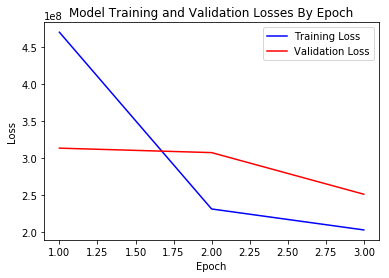

In [12]:
# Will grab our losses by going into the training history and defining appropriate variables to make plotting easier

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Now plot our training and validation losses

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training and Validation Losses By Epoch')
plt.legend()
plt.show()

In [13]:
# Will now have our model make a prediction
# X will be our input that we give to our model to make its prediction

prediction = model.predict_generator(test, steps = 1)
print(prediction)

[[1.653952e+08]]


## Model Evaluation

As is evident from the plot and historical output above, our model is able to achieve accuracy in the range of _%-_%. Furthermore, it is evident that in using _ epochs, the model is able to avoid overfitting to the training data. As such, it can be concluded that our model is sufficiently effective in predicting future asset growth for Canadian Credit Unions using Yelp! reviews, and yearly asset growth. Lastly, it can be concluded that Vancity Credit Uni